# Coding Exercise

Ellen Cosgrove

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import json
import urllib.request
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
api_key = 'FXCYXSRdxeSo3PfLsFd65xisIDww4Qto2a7uYsM2'

# Part A

Using the data from the OpenFDA API (documentation at https://open.fda.gov/apis/drug/label/) to determine the average number of ingredients (spl_product_data_elements) contained in AstraZeneca medicines per year.

    1. Choose a method to gather the data
    2. Transform the data as you see fit
    3. Visualize and explore the results

## Loading the data

In [3]:
# Loading in data from API
# Importing the maximum amount of data, where the manufacturer is AstraZeneca
url = 'https://api.fda.gov/drug/label.json?api_key=FXCYXSRdxeSo3PfLsFd65xisIDww4Qto2a7uYsM2&search=openfda.manufacturer_name:"Astrazeneca"&limit=100'
request = urllib.request.urlopen(url) 

load = json.loads(request.read())
data_a = json_normalize(load['results'])
data_a.head()

,abuse,adverse_reactions,adverse_reactions_table,animal_pharmacology_and_or_toxicology,boxed_warning,carcinogenesis_and_mutagenesis_and_impairment_of_fertility,clinical_pharmacology,clinical_pharmacology_table,clinical_studies,clinical_studies_table,...,spl_unclassified_section,storage_and_handling,storage_and_handling_table,teratogenic_effects,use_in_specific_populations,use_in_specific_populations_table,version,warnings,warnings_and_cautions,warnings_and_cautions_table
0,NaN,[6. ADVERSE REACTIONS Because clinical trials ...,"[<table ID=""_RefID0EHMAC"" width=""100%""> <capti...",NaN,NaN,"[13.1. Carcinogenesis, Mutagenesis, Impairment...",[12. CLINICAL PHARMACOLOGY 12.1. Mechanism of ...,"[<table width=""100%""> <caption>Table 3. Pharma...",[14. CLINICAL STUDIES 14.1. CASODEX 50 mg Dail...,NaN,...,NaN,[16.1. Storage and Handling Store at controlle...,NaN,NaN,[8. USE IN SPECIFIC POPULATIONS •Females and M...,"[<table ID=""_RefID0EXPAE"" width=""100%""> <capti...",20,NaN,[5. WARNINGS AND PRECAUTIONS •Severe hepatic i...,NaN
1,[9.2 Abuse SEROQUEL has not been systematicall...,[6 ADVERSE REACTIONS The following adverse rea...,"[<table ID=""_RefID0EBEBI"" width=""100%""> <capti...",[13.2 Animal Toxicology and/or Pharmacology Qu...,[WARNING: INCREASED MORTALITY IN ELDERLY PATIE...,"[13.1 Carcinogenesis, Mutagenesis, Impairment ...",[12 CLINICAL PHARMACOLOGY 12.1 Mechanism of Ac...,"[<table ID=""_RefID0EGZBK"" width=""100%""> <capti...",[14 CLINICAL STUDIES 14.1 Schizophrenia Short-...,"[<table ID=""_RefID0EXJCK"" width=""100%""> <capti...",...,NaN,NaN,NaN,NaN,[8 USE IN SPECIFIC POPULATIONS • Pregnancy: Li...,NaN,40,NaN,[5 WARNINGS AND PRECAUTIONS • Cerebrovascular ...,"[<table ID=""_RefID0EO2AG"" width=""100%""> <capti..."
2,NaN,[6 ADVERSE REACTIONS Serious adverse reactions...,"[<table ID=""_RefID0ERAAE"" width=""100%""> <capti...",[13.2 Animal Toxicology and/or Pharmacology Re...,NaN,"[13.1 Carcinogenesis, Mutagenesis, Impairment ...",[12 CLINICAL PHARMACOLOGY 12.1 Mechanism of Ac...,NaN,[14 CLINICAL STUDIES 14.1 Adjuvant Treatment o...,"[<table ID=""_Refrowellsl1231183834160"" width=""...",...,NaN,"[Storage Store at controlled room temperature,...",NaN,NaN,[8 USE IN SPECIFIC POPULATIONS •Pediatric pati...,NaN,20,NaN,[5 WARNINGS AND PRECAUTIONS •In women with pre...,NaN
3,NaN,[6 ADVERSE REACTIONS The following serious adv...,"[<table width=""100%""> <caption>Table 1: Advers...",NaN,[WARNING: RISK OF THYROID C-CELL TUMORS • Exen...,"[13.1 Carcinogenesis, Mutagenesis, Impairment ...",[12 CLINICAL PHARMACOLOGY 12.1 Mechanism of Ac...,NaN,[14 CLINICAL STUDIES 14.1 Glycemic Control Tri...,"[<table width=""100%""> <caption>Table 4: Result...",...,NaN,NaN,NaN,NaN,[8 USE IN SPECIFIC POPULATIONS • Pregnancy: Us...,NaN,11,NaN,[5 WARNINGS AND PRECAUTIONS • Acute Pancreatit...,NaN
4,NaN,[6 ADVERSE REACTIONS Systemic and inhaled cort...,"[<table ID=""_RefID0EWNAE"" width=""100%""> <capti...",[13.2 Animal Toxicology Reproductive Toxicolog...,NaN,"[13.1 Carcinogenesis, Mutagenesis, Impairment ...",[12 CLINICAL PHARMACOLOGY 12.1 Mechanism of Ac...,NaN,"[14 CLINICAL STUDIES Three double-blind, place...",NaN,...,NaN,NaN,NaN,NaN,[8 USE IN SPECIFIC POPULATIONS 8.1 Pregnancy T...,NaN,19,NaN,[5 WARNINGS AND PRECAUTIONS • Localized Infect...,NaN


In [4]:
data_a.shape

(45, 82)

In [5]:
data_a.columns

Index(['abuse', 'adverse_reactions', 'adverse_reactions_table',
       'animal_pharmacology_and_or_toxicology', 'boxed_warning',
       'carcinogenesis_and_mutagenesis_and_impairment_of_fertility',
       'clinical_pharmacology', 'clinical_pharmacology_table',
       'clinical_studies', 'clinical_studies_table', 'contraindications',
       'controlled_substance', 'description', 'dosage_and_administration',
       'dosage_and_administration_table', 'dosage_forms_and_strengths',
       'drug_abuse_and_dependence', 'drug_interactions',
       'drug_interactions_table', 'effective_time', 'general_precautions',
       'geriatric_use', 'how_supplied', 'how_supplied_table', 'id',
       'indications_and_usage', 'information_for_patients',
       'information_for_patients_table', 'instructions_for_use',
       'instructions_for_use_table', 'labor_and_delivery', 'laboratory_tests',
       'mechanism_of_action', 'mechanism_of_action_table',
       'nonclinical_toxicology', 'nursing_mothers',
   

In [6]:
#creating a new column, extracting the year from effective_time
data_a['year'] = data_a['effective_time'].apply(lambda i: int(i[0:4]))

In [7]:
#extracting the relavent columns for the analysis
data_a = data_a[['openfda.generic_name','year','spl_product_data_elements']]
data_a.head()

,openfda.generic_name,year,spl_product_data_elements
0,[BICALUTAMIDE],2017,[CASODEX Bicalutamide BICALUTAMIDE BICALUTAMID...
1,[QUETIAPINE FUMARATE],2018,[SEROQUEL Quetiapine fumarate QUETIAPINE FUMAR...
2,[ANASTROZOLE],2014,[ARIMIDEX Anastrozole ANASTROZOLE ANASTROZOLE ...
3,[EXENATIDE],2019,[BYDUREON BCise exenatide EXENATIDE EXENATIDE ...
4,[BUDESONIDE],2016,[PULMICORT RESPULES Budesonide BUDESONIDE BUDE...


In [8]:
data_a.info() # There is no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
openfda.generic_name         45 non-null object
year                         45 non-null int64
spl_product_data_elements    45 non-null object
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [9]:
sorted(data_a['year'].unique())#no data for 2015

[2014, 2016, 2017, 2018, 2019]

In [10]:
# Filtering through the "spl_product_data_elements" column to count the number of ingredients
# Assuming that each ingredient is sperated by a comma
data_a['number_of_ingredients'] = data_a['spl_product_data_elements'].apply(lambda x: len(''.join(x).split(',')))
data_a = data_a.drop('spl_product_data_elements', axis=1)

In [11]:
data_a.head()

,openfda.generic_name,year,number_of_ingredients
0,[BICALUTAMIDE],2017,2
1,[QUETIAPINE FUMARATE],2018,31
2,[ANASTROZOLE],2014,4
3,[EXENATIDE],2019,7
4,[BUDESONIDE],2016,4


In [12]:
data_a = data_a.groupby('year', as_index=False).agg({'openfda.generic_name':'sum','number_of_ingredients':'mean'})
data_a.columns = ['year','drug_name','avg_number_of_ingredients']
data_a

,year,drug_name,avg_number_of_ingredients
0,2014,[ANASTROZOLE],4.000000
1,2016,"[BUDESONIDE, CANDESARTAN CILEXETIL AND HYDROCH...",3.166667
2,2017,"[BICALUTAMIDE, QUETIAPINE FUMARATE, GLYCOPYRRO...",3.500000
3,2018,"[QUETIAPINE FUMARATE, DAPAGLIFLOZIN AND SAXAGL...",6.150000
4,2019,"[EXENATIDE, EXENATIDE, DAPAGLIFLOZIN, FULVESTR...",5.166667


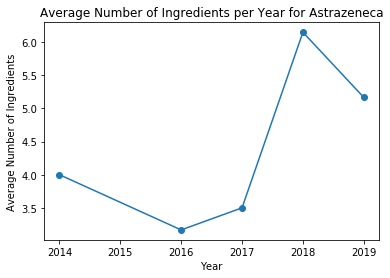

In [13]:
plt.plot(data_a['year'], data_a['avg_number_of_ingredients'], marker = 'o')
plt.xlabel('Year')
plt.ylabel('Average Number of Ingredients')
plt.title('Average Number of Ingredients per Year for Astrazeneca')
plt.show()

# Part B

Repeat the same analysis, calculate the average number of ingredients per year and per delivery route for all manufacturers.

## Loading the Data

In [14]:
# Loading in data from API
# Importing the maximum amount of data
url = 'https://api.fda.gov/drug/label.json?api_key=FXCYXSRdxeSo3PfLsFd65xisIDww4Qto2a7uYsM2&limit=100'
request = urllib.request.urlopen(url) 

load = json.loads(request.read())
data_b = json_normalize(load['results'])
data_b.head()

,abuse,active_ingredient,active_ingredient_table,adverse_reactions,adverse_reactions_table,animal_pharmacology_and_or_toxicology,ask_doctor,ask_doctor_or_pharmacist,boxed_warning,carcinogenesis_and_mutagenesis_and_impairment_of_fertility,...,teratogenic_effects,use_in_specific_populations,use_in_specific_populations_table,user_safety_warnings,version,warnings,warnings_and_cautions,warnings_and_cautions_table,warnings_table,when_using
0,NaN,[ACTIVE INGREDIENT SILICEA HPUS 2X and higher],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,[WARNINGS This product is to be used for self-...,NaN,NaN,NaN,NaN
1,NaN,[BRONZE ACTIVE INGREDIENTS: TITANIUM DIOXIDE 2...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,[Warnings For external use only.],NaN,NaN,NaN,[When using this product keep out of eyes. Rin...
2,NaN,[ACTIVE INGREDIENTS MEZEREUM],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,[STOP USE AND ASK DOCTOR If symptoms persist/w...,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,[ADVERSE REACTIONS Ophthalmic use: The most fr...,NaN,NaN,NaN,NaN,NaN,"[Carcinogenesis, Mutagenesis, Impairment of Fe...",...,NaN,NaN,NaN,NaN,1,[WARNINGS NOT FOR INJECTION. Ofloxacin ophthal...,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,[6 ADVERSE REACTIONS The following adverse rea...,NaN,NaN,NaN,NaN,[WARNING: RISK OF SERIOUS CARDIOVASCULAR AND G...,"[13.1 Carcinogenesis, Mutagenesis, Impairment ...",...,NaN,[8 USE IN SPECIFIC POPULATIONS Pregnancy: Use ...,NaN,NaN,21,NaN,[5 WARNINGS AND PRECAUTIONS Hepatotoxicity: In...,NaN,NaN,NaN


In [15]:
data_b.shape

(100, 114)

In [16]:
data_b = data_b[['effective_time','spl_product_data_elements','openfda.route']]
data_b.head()

,effective_time,spl_product_data_elements,openfda.route
0,20151102,[SILICEA SILICEA SILICON DIOXIDE COLLOIDAL SIL...,[ORAL]
1,20150109,[CHANTECAILLE PROTECTION NATURELLE BRONZE SPF ...,NaN
2,20180801,[Mezereum DAPHNE MEZEREUM BARK SUCROSE LACTOSE...,[ORAL]
3,20171230,[Ofloxacin Ofloxacin OFLOXACIN OFLOXACIN Sodiu...,[OPHTHALMIC]
4,20190124,[Naproxen Naproxen NAPROXEN NAPROXEN CROSCARME...,[ORAL]


In [17]:
data_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
effective_time               100 non-null object
spl_product_data_elements    99 non-null object
openfda.route                66 non-null object
dtypes: object(3)
memory usage: 2.4+ KB


## Tidying up the data

In [18]:
# Year
data_b['year'] = data_b['effective_time'].apply(lambda i: int(i[0:4]))
data_b = data_b.drop('effective_time', axis = 1)
sorted(data_b['year'].unique())

[2006, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [19]:
# Row with no ingredients listed
data_b[data_b['spl_product_data_elements'].isnull()]

,spl_product_data_elements,openfda.route,year
51,NaN,NaN,2006


In [20]:
# Remove row with no ingredients
data_b = data_b.drop([51]).reset_index(drop=True)

In [21]:
# Replace Null values in route with UNKNOWN
data_b['route'] = data_b['openfda.route'].fillna('UNKNOWN')
data_b = data_b.drop('openfda.route', axis = 1)
data_b.head()

,spl_product_data_elements,year,route
0,[SILICEA SILICEA SILICON DIOXIDE COLLOIDAL SIL...,2015,[ORAL]
1,[CHANTECAILLE PROTECTION NATURELLE BRONZE SPF ...,2015,UNKNOWN
2,[Mezereum DAPHNE MEZEREUM BARK SUCROSE LACTOSE...,2018,[ORAL]
3,[Ofloxacin Ofloxacin OFLOXACIN OFLOXACIN Sodiu...,2017,[OPHTHALMIC]
4,[Naproxen Naproxen NAPROXEN NAPROXEN CROSCARME...,2019,[ORAL]


In [22]:
# Number of ingredients
data_b['number_of_ingredients'] = data_b['spl_product_data_elements'].apply(lambda x: len(''.join(x).split(',')))
data_b = data_b.drop('spl_product_data_elements', axis=1)
data_b.head()

,year,route,number_of_ingredients
0,2015,[ORAL],1
1,2015,UNKNOWN,3
2,2018,[ORAL],1
3,2017,[OPHTHALMIC],1
4,2019,[ORAL],2


In [23]:
# tidying route column
data_b['route'] = data_b['route'].apply(lambda x: ''.join(x))
data_b.head()

,year,route,number_of_ingredients
0,2015,ORAL,1
1,2015,UNKNOWN,3
2,2018,ORAL,1
3,2017,OPHTHALMIC,1
4,2019,ORAL,2


In [24]:
data_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
year                     99 non-null int64
route                    99 non-null object
number_of_ingredients    99 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


## Output Table

In [25]:
data_b = data_b.groupby(['year','route'], as_index=False).mean()
data_b

,year,route,number_of_ingredients
0,2009,INTRADERMALSUBCUTANEOUS,1.000000
1,2009,ORAL,2.000000
2,2009,TOPICAL,1.000000
3,2009,UNKNOWN,2.000000
4,2010,ORAL,2.000000
5,2010,TOPICAL,1.000000
6,2010,UNKNOWN,2.500000
7,2011,ORAL,1.000000
8,2012,ORAL,6.500000
9,2012,UNKNOWN,2.000000
